In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# ensure the plots are inside this notebook, not an external window
import matplotlib.pyplot
%matplotlib inline

In [2]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        # set number of nodes in each input,hidden,output layer         
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
    
        # link weight matrices,wih and who
        # weight inside the arrays are w_i_j,where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # self.wih=(numpy.random.rand(self.hnodes,self.inodes)-0.5)
        # self.who=(numpy.random.rand(self.onodes,self.hnodes)-0.5)
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        # learning rate         
        self.lr=learningrate
        
        # activation function is the sigmoid function
        self.activation_function=lambda x:scipy.special.expit(x)
        
        pass
        
    # train the neural network
    def train(self,input_list,targets_list):
        # convert inputs list to 2d array
        inputs=numpy.array(input_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs=self.activation_function(final_inputs)
        # error is the (target-actual)
        output_errors=targets-final_outputs
        # hidden layer error is the output_errors,split by weights,recombined at hidden nodes
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
    
    # query the neural network
    def query(self,input_list):
        # convert inputs list to 2d array
        inputs=numpy.array(input_list,ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs=numpy.dot(self.wih,inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs=numpy.dot(self.who,hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# number of input,hidden and output nodes
input_nodes=784
hidden_nodes=200
output_nodes=10

# learning rate is 0.1
learning_rate=0.1

# create instance of neural network
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# load the mnist training data CSV file into a list
training_data_file=open('mnist_dataset/mnist_train.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs=7

for e in range(epochs):
    # go through all records in the training data set 
    for record in training_data_list:
        # split the record by the ',' commas
        all_values=record.split(',')
        # scale and shift the inputs
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        # create the target output values (all 0.01,expect the desired label which is 0.99)
        targets=numpy.zeros(output_nodes)+0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass

In [4]:
# load the mnist test data CSV file into a list
test_data_file=open('mnist_dataset/mnist_train.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [5]:
# test the neural network

# scorecard for how well the network performs,initially empty
scorecard=[]

# go through all the records in the test data set
for record in test_data_list:
    # split the record the by the ',' commas
    all_values=record.split(',')
    # correct answer is first value
    correct_label=int(all_values[0])
    # scale and shift the inputs
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    # query the network
    outputs=n.query(inputs)
    # the index of the highest value corresponds to the label
    label=numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label==correct_label):
        # network's answer matches correct answer,add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer,add 0 to scorecard
        scorecard.append(0)
        pass
    pass

In [6]:
# calculate the performance score,the function of correct answers
scorecard_array=numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.9887166666666667


In [7]:
import imageio
img_array=imageio.imread('my_own_images/bird_5.png',as_gray=True)

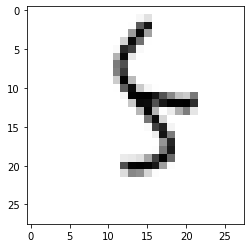

In [8]:
img_data=255.0-img_array
img_data=(img_data/255.0*0.99)+0.01
matplotlib.pyplot.imshow(img_data,cmap='Greys',interpolation='None')

In [9]:
img_data=255.0-img_array.reshape(784)
img_data=(img_data/255.0*0.99)+0.01

In [10]:
numpy.argmax(n.query(img_data))

6

In [11]:
def use_your_mnist_test(image,correct_label):
    img_array=imageio.imread(image,as_gray=True)
    img_show=255.0-img_array
    matplotlib.pyplot.imshow(img_show,cmap='Greys',interpolation='None')
    img_data=255.0-img_array.reshape(784)
    img_data=(img_data/255.0*0.99)+0.01
    result=n.query(img_data)
    print(result)
    network_label=numpy.argmax(result)
    print('network says ',network_label)
    if network_label==correct_label:
        print('match!')
    else:
        print('no match!')

[[1.11653840e-04]
 [1.69310145e-01]
 [2.75758901e-03]
 [8.71652819e-03]
 [2.18101756e-04]
 [2.11206724e-02]
 [4.14747132e-01]
 [1.00896309e-01]
 [1.67468423e-03]
 [1.33236181e-01]]
network says  6
no match!


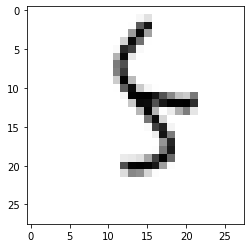

In [12]:
use_your_mnist_test('my_own_images/bird_5.png',5)

[[5.49945070e-03]
 [2.43772251e-03]
 [1.04023091e-02]
 [5.88067512e-01]
 [3.15072010e-03]
 [3.07876373e-04]
 [1.16115944e-03]
 [2.84114263e-01]
 [1.21933265e-03]
 [3.72261300e-01]]
network says  3
match!


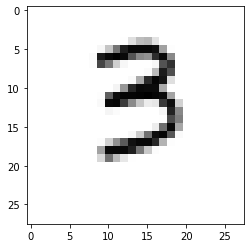

In [13]:
use_your_mnist_test('my_own_images/my_own_3.png',3)

[[1.20354351e-03]
 [9.81588066e-03]
 [7.53839575e-01]
 [2.82899347e-01]
 [9.13217314e-03]
 [1.12110026e-03]
 [4.95840924e-04]
 [1.85933100e-01]
 [2.78442152e-04]
 [6.93269276e-04]]
network says  2
match!


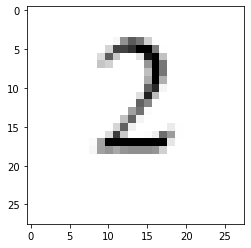

In [14]:
use_your_mnist_test('my_own_images/2828_my_own_2.png',2)

[[2.11943632e-03]
 [1.79906293e-03]
 [6.77814337e-04]
 [9.44164780e-01]
 [3.70096003e-04]
 [5.82916137e-02]
 [7.81798124e-03]
 [9.27557979e-03]
 [6.35654558e-04]
 [4.38065275e-03]]
network says  3
match!


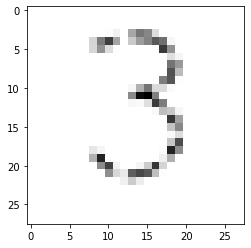

In [15]:
use_your_mnist_test('my_own_images/2828_my_own_3.png',3)

[[7.11908519e-04]
 [4.31142599e-03]
 [1.19470158e-01]
 [9.33773949e-04]
 [9.54919481e-01]
 [1.06244371e-02]
 [1.55186176e-02]
 [2.02531027e-02]
 [1.11536483e-04]
 [5.77165134e-04]]
network says  4
match!


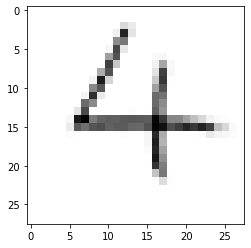

In [16]:
use_your_mnist_test('my_own_images/2828_my_own_4.png',4)

[[5.72565085e-03]
 [7.87909500e-03]
 [1.46074868e-03]
 [3.64349376e-02]
 [2.61368155e-04]
 [8.56457394e-01]
 [1.31082153e-02]
 [9.44487940e-02]
 [5.31143410e-05]
 [5.78164892e-03]]
network says  5
match!


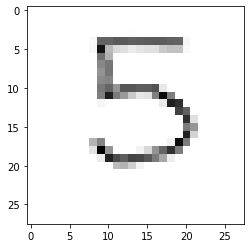

In [17]:
use_your_mnist_test('my_own_images/2828_my_own_5.png',5)

[[0.00231858]
 [0.03644677]
 [0.0006855 ]
 [0.01405344]
 [0.00143746]
 [0.09607929]
 [0.32717096]
 [0.0091019 ]
 [0.00197635]
 [0.01905625]]
network says  6
match!


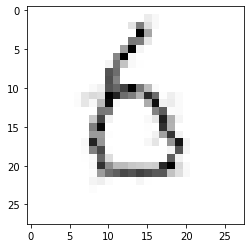

In [18]:
use_your_mnist_test('my_own_images/2828_my_own_6.png',6)

[[0.00216111]
 [0.00326651]
 [0.01025501]
 [0.97339123]
 [0.00120012]
 [0.00358309]
 [0.00725179]
 [0.01289214]
 [0.00270949]
 [0.10386495]]
network says  3
match!


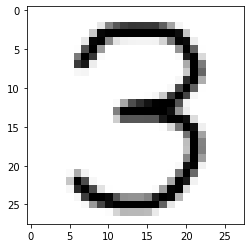

In [19]:
use_your_mnist_test('my_own_images/2828_my_own_image.png',3)

[[0.10646704]
 [0.00900443]
 [0.18552729]
 [0.27502496]
 [0.00692015]
 [0.19734505]
 [0.02306064]
 [0.022212  ]
 [0.41099475]
 [0.10389184]]
network says  8
no match!


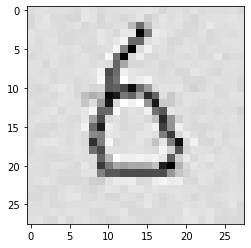

In [20]:
use_your_mnist_test('my_own_images/2828_my_own_noisy_6.png',6)

[[1.42951229e-03]
 [2.35168128e-03]
 [7.82355481e-03]
 [2.03051455e-03]
 [7.82089968e-04]
 [9.94797497e-01]
 [4.62052492e-04]
 [2.23114525e-04]
 [5.37888152e-02]
 [8.59691828e-02]]
network says  5
match!


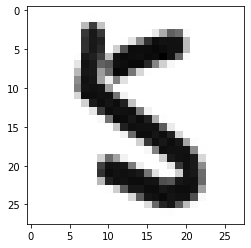

In [21]:
use_your_mnist_test('my_own_images/5.png',5)